# Overview

The examples in this tutorial focus on the fundamentals of working with gridded, labeled data using Xarray. Xarray works by introducing additional abstractions into otherwise ordinary data arrays. In this tutorial, we demonstrate the usefulness of these abstractions. The examples in this tutorial explain how the proper usage of Xarray abstractions generally leads to simpler, more robust code.

The following topics will be covered in this tutorial:

1. Create a <span style='color:red'>DataArray</span>, one of the core object types in Xarray

2. Understand how to use named coordinates and metadata in a <span style='color:red'>DataArray</span>

3. Combine individual <span style='color:red'>DataArrays</span> into a <span style='color:red'>Dataset</span>, the other core object type in Xarray

4. Subset, slice, and interpolate the data using named coordinates

5. Open netCDF data using Xarray

6. Basic subsetting and aggregation of a <span style='color:red'>Dataset</span>

7. Brief introduction to plotting with Xarray

In [6]:
from datetime import timedelta

import numpy as np
import pandas as pd
import xarray as xr

## Introducing the <span style='color:red'>DataArray</span> and <span style='color:red'>Dataset</span>

As stated in earlier tutorials, NumPy arrays contain many useful features, making NumPy an essential part of the scientific Python stack. Xarray expands on these features, adding streamlined data manipulation capabilities. These capabilities are similar to those provided by Pandas, except that they are focused on gridded N-dimensional data instead of tabular data. Its interface is based largely on the netCDF data model (variables, attributes, and dimensions), but it goes beyond the traditional netCDF interfaces in order to provide additional useful functionality, similar to netCDF-java’s Common Data Model (CDM).

### Creation of a <span style='color:red'>DataArray</span> object

The <span style='color:red'>DataArray</span> in one of the most basic elements of Xarray; a <span style='color:red'>DataArray</span> object is similar to a numpy <span style='color:red'>ndarray</span> object. (For more information, see the documentation here (http://xarray.pydata.org/en/stable/user-guide/data-structures.html#dataarray).) In addition to retaining most functionality from NumPy arrays, Xarray <span style='color:red'>DataArrays</span> provide two critical pieces of functionality:

1. Coordinate names and values are stored with the data, making slicing and indexing much more powerful.

2. Attributes, similar to those in netCDF files, can be stored in a container built into the <span style='color:red'>DataArray</span>.

In these examples, we create a NumPy array, and use it as a wrapper for a new <span style='color:red'>DataArray</span> object; we then explore some properties of a <span style='color:red'>DataArray</span>.

<b>Generate a random numpy array</b>

In this first example, we create a numpy array, holding random placeholder data of temperatures in Kelvin:

In [11]:
data = 283 + 5 * np.random.randn(5, 3, 4,)
data

array([[[289.83454974, 288.08718719, 281.67254138, 278.48112134],
        [281.9487349 , 286.15764577, 271.58856616, 280.80472755],
        [280.62889529, 278.1963971 , 276.56597527, 290.1331695 ]],

       [[290.96558248, 274.91326055, 270.04237928, 276.00669805],
        [282.03521641, 290.78234591, 288.97530388, 284.46620945],
        [285.58490156, 276.72979019, 285.46469427, 285.45504638]],

       [[283.65615667, 277.24351817, 282.58922774, 282.69046831],
        [275.3828364 , 293.16417878, 273.16464793, 296.94447211],
        [288.86301915, 273.11605113, 269.30221747, 281.68897471]],

       [[280.31303074, 282.53110395, 281.77709418, 283.72158451],
        [278.23150165, 285.69137615, 286.07772526, 278.82465408],
        [290.26610407, 280.64096888, 278.28364381, 277.09227   ]],

       [[285.95711156, 281.16248775, 284.22127036, 277.33735238],
        [290.67303794, 289.14260324, 281.15116643, 288.1139084 ],
        [277.75423427, 285.87809814, 282.58826599, 283.69648285]]])

#### Wrap the array: first attempt

For our first attempt at wrapping a NumPy array into a <span style='color:red'>DataArray</span>, we simply use the <span style='color:red'>DataArray</span> method of Xarray, passing the NumPy array we just created:

In [12]:
temp = xr.DataArray(data)
temp

<xarray.DataArray (dim_0: 5, dim_1: 3, dim_2: 4)>
array([[[289.83454974, 288.08718719, 281.67254138, 278.48112134],
        [281.9487349 , 286.15764577, 271.58856616, 280.80472755],
        [280.62889529, 278.1963971 , 276.56597527, 290.1331695 ]],

       [[290.96558248, 274.91326055, 270.04237928, 276.00669805],
        [282.03521641, 290.78234591, 288.97530388, 284.46620945],
        [285.58490156, 276.72979019, 285.46469427, 285.45504638]],

       [[283.65615667, 277.24351817, 282.58922774, 282.69046831],
        [275.3828364 , 293.16417878, 273.16464793, 296.94447211],
        [288.86301915, 273.11605113, 269.30221747, 281.68897471]],

       [[280.31303074, 282.53110395, 281.77709418, 283.72158451],
        [278.23150165, 285.69137615, 286.07772526, 278.82465408],
        [290.26610407, 280.64096888, 278.28364381, 277.09227   ]],

       [[285.95711156, 281.16248775, 284.22127036, 277.33735238],
        [290.67303794, 289.14260324, 281.15116643, 288.1139084 ],
        [277.75423427, 285.87809814, 282.58826599, 283.69648285]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

Note two things:

1. Since NumPy arrays have no dimension names, our new <span style='color:red'>DataArray</span> takes on placeholder dimension names, in this case <span style='color:red'>dim_0</span>, <span style='color:red'>dim_1</span>, and <span style='color:red'>dim_2</span>. In our next example, we demonstrate how to add more meaningful dimension names.

2. If you are viewing this page as a Jupyter Notebook, running the above example generates a rich display of the data contained in our <span style='color:red'>DataArray</span>. This display comes with many ways to explore the data; for example, clicking the array symbol expands or collapses the data view.

#### Assign dimension names

Much of the power of Xarray comes from making use of named dimensions. In order to make full use of this, we need to provide more useful dimension names. We can generate these names when creating a <span style='color:red'>DataArray</span> by passing an ordered list of names to the <span style='color:red'>DataArray</span> method, using the keyword argument <span style='color:red'>dims</span>:

In [13]:
temp = xr.DataArray(data, dims=['time', 'lat', 'lon'])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[289.83454974, 288.08718719, 281.67254138, 278.48112134],
        [281.9487349 , 286.15764577, 271.58856616, 280.80472755],
        [280.62889529, 278.1963971 , 276.56597527, 290.1331695 ]],

       [[290.96558248, 274.91326055, 270.04237928, 276.00669805],
        [282.03521641, 290.78234591, 288.97530388, 284.46620945],
        [285.58490156, 276.72979019, 285.46469427, 285.45504638]],

       [[283.65615667, 277.24351817, 282.58922774, 282.69046831],
        [275.3828364 , 293.16417878, 273.16464793, 296.94447211],
        [288.86301915, 273.11605113, 269.30221747, 281.68897471]],

       [[280.31303074, 282.53110395, 281.77709418, 283.72158451],
        [278.23150165, 285.69137615, 286.07772526, 278.82465408],
        [290.26610407, 280.64096888, 278.28364381, 277.09227   ]],

       [[285.95711156, 281.16248775, 284.22127036, 277.33735238],
        [290.67303794, 289.14260324, 281.15116643, 288.1139084 ],
        [277.75423427, 285.87809814, 282.58826599, 283.69648285]]])
Dimensions without coordinates: time, lat, lon

This <span style='color:red'>DataArray</span> is already an improvement over a NumPy array; the <span style='color:red'>DataArray</span> contains names for each of the dimensions (or axes in NumPy parlance). An additional improvement is the association of coordinate-value arrays with data upon creation of a <span style='color:red'>DataArray</span>. In the next example, we illustrate the creation of NumPy arrays representing the coordinate values for each dimension of the <span style='color:red'>DataArray</span>, and how to associate these coordinate arrays with the data in our <span style='color:red'>DataArray</span>.

### Create a <span style='color:red'>DataArray</span> with named Coordinates

#### Make time and space coordinates

In this example, we use <span style='color:blue'>Pandas</span> to create an array of <span style='color:blue'>datetime</span> data. This array will be used in a later example to add a named coordinate, called <span style='color:red'>time</span>, to a <span style='color:red'>DataArray</span>.

In [14]:
times = pd.date_range("2018-01-01", periods=5)
times

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

Before associating coordinates with our <span style='color:red'>DataArray</span>, we must also create latitude and longitude coordinate arrays. In these examples, we use placeholder data, and create the arrays in NumPy format:

In [15]:
lons = np.linspace(-120, -60, 4)
lats = np.linspace(25, 55, 3)

#### Initialize the <span style='color:red'>DataArray</span> with complete coordinate info

In this example, we create a new <span style='color:red'>DataArray</span>. Similar to an earlier example, we use the dims keyword argument to specify the dimension names; however, in this case, we also specify the coordinate arrays using the <span style='color:red'>coords</span> keyword argument:

In [16]:
temp = xr.DataArray(data, coords=[times, lats, lons], dims=['time', 'lat', 'lon'])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[289.83454974, 288.08718719, 281.67254138, 278.48112134],
        [281.9487349 , 286.15764577, 271.58856616, 280.80472755],
        [280.62889529, 278.1963971 , 276.56597527, 290.1331695 ]],

       [[290.96558248, 274.91326055, 270.04237928, 276.00669805],
        [282.03521641, 290.78234591, 288.97530388, 284.46620945],
        [285.58490156, 276.72979019, 285.46469427, 285.45504638]],

       [[283.65615667, 277.24351817, 282.58922774, 282.69046831],
        [275.3828364 , 293.16417878, 273.16464793, 296.94447211],
        [288.86301915, 273.11605113, 269.30221747, 281.68897471]],

       [[280.31303074, 282.53110395, 281.77709418, 283.72158451],
        [278.23150165, 285.69137615, 286.07772526, 278.82465408],
        [290.26610407, 280.64096888, 278.28364381, 277.09227   ]],

       [[285.95711156, 281.16248775, 284.22127036, 277.33735238],
        [290.67303794, 289.14260324, 281.15116643, 288.1139084 ],
        [277.75423427, 285.87809814, 282.58826599, 283.69648285]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

#### Set useful attributes

As described above, <span style='color:red'>DataArrays</span> have a built-in container for attribute metadata. These attributes are similar to those in netCDF files, and are added to a <span style='color:red'>DataArray</span> using its <span style='color:red'>attrs</span> method:

In [17]:
temp.attrs['units'] = 'kelvin'
temp.attrs['standard_name'] = 'air_temperature'
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[289.83454974, 288.08718719, 281.67254138, 278.48112134],
        [281.9487349 , 286.15764577, 271.58856616, 280.80472755],
        [280.62889529, 278.1963971 , 276.56597527, 290.1331695 ]],

       [[290.96558248, 274.91326055, 270.04237928, 276.00669805],
        [282.03521641, 290.78234591, 288.97530388, 284.46620945],
        [285.58490156, 276.72979019, 285.46469427, 285.45504638]],

       [[283.65615667, 277.24351817, 282.58922774, 282.69046831],
        [275.3828364 , 293.16417878, 273.16464793, 296.94447211],
        [288.86301915, 273.11605113, 269.30221747, 281.68897471]],

       [[280.31303074, 282.53110395, 281.77709418, 283.72158451],
        [278.23150165, 285.69137615, 286.07772526, 278.82465408],
        [290.26610407, 280.64096888, 278.28364381, 277.09227   ]],

       [[285.95711156, 281.16248775, 284.22127036, 277.33735238],
        [290.67303794, 289.14260324, 281.15116643, 288.1139084 ],
        [277.75423427, 285.87809814, 282.58826599, 283.69648285]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

##### Issues with preservation of attributes

In this example, we illustrate an important concept relating to attributes. When a mathematical operation is performed on a <span style='color:red'>DataArray</span>, all of the coordinate arrays remain attached to the <span style='color:red'>DataArray</span>, but any attribute metadata assigned is lost. Attributes are removed in this way due to the fact that they may not convey correct or appropriate metadata after an arbitrary arithmetic operation.

This example converts our DataArray values from Kelvin to degrees Celsius. Pay attention to the attributes in the Jupyter rich display below. (If you are not viewing this page as a Jupyter notebook, see the Xarray documentation to learn how to display the attributes.)

In [18]:
temp_in_celcius = temp - 273.15
temp_in_celcius

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[ 1.66845497e+01,  1.49371872e+01,  8.52254138e+00,
          5.33112134e+00],
        [ 8.79873490e+00,  1.30076458e+01, -1.56143384e+00,
          7.65472755e+00],
        [ 7.47889529e+00,  5.04639710e+00,  3.41597527e+00,
          1.69831695e+01]],

       [[ 1.78155825e+01,  1.76326055e+00, -3.10762072e+00,
          2.85669805e+00],
        [ 8.88521641e+00,  1.76323459e+01,  1.58253039e+01,
          1.13162094e+01],
        [ 1.24349016e+01,  3.57979019e+00,  1.23146943e+01,
          1.23050464e+01]],

       [[ 1.05061567e+01,  4.09351817e+00,  9.43922774e+00,
          9.54046831e+00],
        [ 2.23283640e+00,  2.00141788e+01,  1.46479268e-02,
          2.37944721e+01],
        [ 1.57130191e+01, -3.39488687e-02, -3.84778253e+00,
          8.53897471e+00]],

       [[ 7.16303074e+00,  9.38110395e+00,  8.62709418e+00,
          1.05715845e+01],
        [ 5.08150165e+00,  1.25413761e+01,  1.29277253e+01,
          5.67465408e+00],
        [ 1.71161041e+01,  7.49096888e+00,  5.13364381e+00,
          3.94227000e+00]],

       [[ 1.28071116e+01,  8.01248775e+00,  1.10712704e+01,
          4.18735238e+00],
        [ 1.75230379e+01,  1.59926032e+01,  8.00116643e+00,
          1.49639084e+01],
        [ 4.60423427e+00,  1.27280981e+01,  9.43826599e+00,
          1.05464829e+01]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

In addition, if you need more details on how Xarray handles metadata, you can review this documentation page (http://xarray.pydata.org/en/stable/getting-started-guide/faq.html#approach-to-metadata).

#### The <span style='color:red'>Dataset</span>: a container for <span style='color:red'>DataArray</span>s with shared coordinates

Along with the <span style='color:red'>DataArray</span>, the other main object type in Xarray is the <span style='color:red'>Dataset</span>. <span style='color:red'>Datasets</span> are containers similar to Python dictionaries; each <span style='color:red'>Dataset</span> can hold one or more <span style='color:red'>DataArrays</span>. In addition, the <span style='color:red'>DataArrays</span> contained in a <span style='color:red'>Dataset</span> can share coordinates, although this behavior is optional. (For more information, see the official documentation page.)

<span style='color:red'>Dataset</span> objects are most often created by loading data from a data file. We will cover this functionality in a later example; in this example, we will create a <span style='color:red'>Dataset</span> from two <span style='color:red'>DataArrays</span>. We will use our existing temperature <span style='color:red'>DataArray</span> for one of these <span style='color:red'>DataArrays</span>; the other one is created in the next example.

In addition, both of these <span style='color:red'>DataArrays</span> will share coordinate axes. Therefore, the next example will also illustrate the usage of common coordinate axes across <span style='color:red'>DataArrays</span> in a <span style='color:red'>Dataset</span>.

In [22]:
pressure_data = 1000.0 + 5 * np.random.randn(5, 3, 4)

pressure = xr.DataArray(pressure_data, coords=[times, lats, lons], dims=['time', 'lat', 'lon'])
pressure.attrs['units'] = 'hPa'
pressure.attrs['standard_name'] = 'air_pressure'

pressure

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[1000.11287175,  985.60068865,  996.80729502,  990.37326549],
        [ 994.47150762, 1005.71606439, 1000.09140346,  996.24167701],
        [ 999.91338729,  996.79500836, 1008.45375542, 1000.61335366]],

       [[1010.92393028, 1009.29911075, 1003.42731516, 1004.74461991],
        [1006.61927752,  993.31901823,  994.44086255, 1001.97252718],
        [1003.04201661, 1002.58431404, 1000.97412365, 1005.02543412]],

       [[ 999.14948612, 1006.19003084,  988.17741658,  994.18412562],
        [ 997.25091009,  999.07872899, 1003.23387018, 1013.95217299],
        [1002.56384139,  988.19413559, 1003.8112068 , 1005.29308001]],

       [[ 999.14827718, 1000.12495831, 1003.12099671,  997.16849125],
        [ 993.25813497,  999.43498112,  989.48443085,  995.40226516],
        [1004.56210805,  991.90328406,  996.84072467,  995.09477504]],

       [[ 996.15643833,  993.98225296, 1000.3359278 ,  999.64978535],
        [1005.22212808, 1005.42050882, 1003.29665398, 1008.48984742],
        [1005.45156735,  995.2529663 , 1005.32864305, 1000.76710325]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

#### Create a <span style='color:red'>Dataset</span> object

Before we can create a <span style='color:red'>Dataset</span> object, we must first name each of the <span style='color:red'>DataArray</span> objects that will be added to the new <span style='color:red'>Dataset</span>.

To name the <span style='color:red'>DataArrays</span> that will be added to our <span style='color:red'>Dataset</span>, we can set up a Python dictionary as shown in the next example. We can then pass this dictionary to the <span style='color:red'>Dataset</span> method using the keyword argument <span style='color:red'>data_vars</span>; this creates a new <span style='color:red'>Dataset</span> containing both of our <span style='color:red'>DataArrays</span>.

In [24]:
ds = xr.Dataset(data_vars={'Temperature': temp, 'Pressure': pressure})
ds

<xarray.Dataset>
Dimensions:      (time: 5, lat: 3, lon: 4)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat          (lat) float64 25.0 40.0 55.0
  * lon          (lon) float64 -120.0 -100.0 -80.0 -60.0
Data variables:
    Temperature  (time, lat, lon) float64 289.8 288.1 281.7 ... 282.6 283.7
    Pressure     (time, lat, lon) float64 1e+03 985.6 ... 1.005e+03 1.001e+03

As listed in the rich display above, the new <span style='color:red'>Dataset</span> object is aware that both <span style='color:red'>DataArrays</span> share the same coordinate axes. (Please note that if this page is not run as a Jupyter Notebook, the rich display may be unavailable.)

#### Access Data variables and Coordinates in a <span style='color:red'>Dataset</span>

This set of examples illustrates different methods for retrieving <span style='color:red'>DataArrays</span> from a <span style='color:red'>Dataset</span>.

This first example shows how to retrieve <span style='color:red'>DataArrays</span> using the “dot” notation:

In [25]:
ds.Pressure

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)>
array([[[1000.11287175,  985.60068865,  996.80729502,  990.37326549],
        [ 994.47150762, 1005.71606439, 1000.09140346,  996.24167701],
        [ 999.91338729,  996.79500836, 1008.45375542, 1000.61335366]],

       [[1010.92393028, 1009.29911075, 1003.42731516, 1004.74461991],
        [1006.61927752,  993.31901823,  994.44086255, 1001.97252718],
        [1003.04201661, 1002.58431404, 1000.97412365, 1005.02543412]],

       [[ 999.14948612, 1006.19003084,  988.17741658,  994.18412562],
        [ 997.25091009,  999.07872899, 1003.23387018, 1013.95217299],
        [1002.56384139,  988.19413559, 1003.8112068 , 1005.29308001]],

       [[ 999.14827718, 1000.12495831, 1003.12099671,  997.16849125],
        [ 993.25813497,  999.43498112,  989.48443085,  995.40226516],
        [1004.56210805,  991.90328406,  996.84072467,  995.09477504]],

       [[ 996.15643833,  993.98225296, 1000.3359278 ,  999.64978535],
        [1005.22212808, 1005.42050882, 1003.29665398, 1008.48984742],
        [1005.45156735,  995.2529663 , 1005.32864305, 1000.76710325]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

In [26]:
ds['Pressure']

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)>
array([[[1000.11287175,  985.60068865,  996.80729502,  990.37326549],
        [ 994.47150762, 1005.71606439, 1000.09140346,  996.24167701],
        [ 999.91338729,  996.79500836, 1008.45375542, 1000.61335366]],

       [[1010.92393028, 1009.29911075, 1003.42731516, 1004.74461991],
        [1006.61927752,  993.31901823,  994.44086255, 1001.97252718],
        [1003.04201661, 1002.58431404, 1000.97412365, 1005.02543412]],

       [[ 999.14948612, 1006.19003084,  988.17741658,  994.18412562],
        [ 997.25091009,  999.07872899, 1003.23387018, 1013.95217299],
        [1002.56384139,  988.19413559, 1003.8112068 , 1005.29308001]],

       [[ 999.14827718, 1000.12495831, 1003.12099671,  997.16849125],
        [ 993.25813497,  999.43498112,  989.48443085,  995.40226516],
        [1004.56210805,  991.90328406,  996.84072467,  995.09477504]],

       [[ 996.15643833,  993.98225296, 1000.3359278 ,  999.64978535],
        [1005.22212808, 1005.42050882, 1003.29665398, 1008.48984742],
        [1005.45156735,  995.2529663 , 1005.32864305, 1000.76710325]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

<span style='color:red'>Dataset</span> objects are mainly used for loading data from files, which will be covered later in this tutorial.

### Subsetting and selection by coordinate values

Much of the power of labeled coordinates comes from the ability to select data based on coordinate names and values instead of array indices. This functionality will be covered on a basic level in these examples. (Later tutorials will cover this topic in much greater detail.)

#### NumPy-like selection

In these examples, we are trying to extract all of our spatial data for a single date; in this case, January 2, 2018. For our first example, we retrieve spatial data using index selection, as with a NumPy array:

In [27]:
indexed_selection = temp[1, :, :] # Index 1 along axis 0 is the time slice we want..
indexed_selection

<xarray.DataArray (lat: 3, lon: 4)>
array([[290.96558248, 274.91326055, 270.04237928, 276.00669805],
       [282.03521641, 290.78234591, 288.97530388, 284.46620945],
       [285.58490156, 276.72979019, 285.46469427, 285.45504638]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

This example reveals one of the major shortcomings of index selection. In order to retrieve the correct data using index selection, anyone using a <span style='color:red'>DataArray</span> must have precise knowledge of the axes in the <span style='color:red'>DataArray</span>, including the order of the axes and the meaning of their indices.

By using named coordinates, as shown in the next set of examples, we can avoid this cumbersome burden.

### Selecting with <span style='color:red'>.sel()</span>

In this example, we show how to select data based on coordinate values, by way of the <span style='color:red'>.sel()</span> method. This method takes one or more named coordinates in keyword-argument format, and returns data matching the coordinates.

In [28]:
named_selection = temp.sel(time='2018-01-02')
named_selection



<xarray.DataArray (lat: 3, lon: 4)>
array([[290.96558248, 274.91326055, 270.04237928, 276.00669805],
       [282.03521641, 290.78234591, 288.97530388, 284.46620945],
       [285.58490156, 276.72979019, 285.46469427, 285.45504638]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

This method yields the same result as the index selection, however:

* we didn’t have to know anything about how the array was created or stored

* our code is agnostic about how many dimensions we are dealing with

* the intended meaning of our code is much clearer

### Approximate selection and interpolation

When working with temporal and spatial data, it is a common practice to sample data close to the coordinate points in a dataset. The following set of examples illustrates some common techniques for this practice.

#### Nearest-neighbor sampling

In this example, we are trying to sample a temporal data point within 2 days of the date <span style='color:red'>2018-01-07</span>. Since the final date on our <span style='color:red'>DataArray</span>’s temporal axis is <span style='color:red'>2018-01-05</span>, this is an appropriate problem.

We can use the <span style='color:red'>.sel()</span> method to perform nearest-neighbor sampling, by setting the <span style='color:red'>method</span> keyword argument to ‘nearest’. We can also optionally provide a <span style='color:red'>tolerance</span> argument; with temporal data, this is a <span style='color:red'>timedelta</span> object.

In [31]:
temp.sel(time='2018-01-07', method='nearest', tolerance=timedelta(days=2))

<xarray.DataArray (lat: 3, lon: 4)>
array([[285.95711156, 281.16248775, 284.22127036, 277.33735238],
       [290.67303794, 289.14260324, 281.15116643, 288.1139084 ],
       [277.75423427, 285.87809814, 282.58826599, 283.69648285]])
Coordinates:
    time     datetime64[ns] 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

Using the rich display above, we can see that <span style='color:red'>.sel</span> indeed returned the data at the temporal value corresponding to the date <span style='color:red'>2018-01-05</span>.

#### Interpolation

In this example, we are trying to extract a timeseries for Boulder, CO, which is located at 40°N latitude and 105°W longitude. Our <span style='color:red'>DataArray</span> does not contain a longitude data value of -105, so in order to retrieve this timeseries, we must interpolate between data points.

The <span style='color:red'>.interp()</span> method allows us to retrieve data from any latitude and longitude by means of interpolation. This method uses coordinate-value selection, similarly to <span style='color:red'>.sel()</span>. (For more information on the <span style='color:red'>.interp()</span> method, see the official documentation here (http://xarray.pydata.org/en/stable/interpolation.html).)

In [34]:
temp.interp(lon=-105, lat=40)

<xarray.DataArray (time: 5)>
array([285.10541805, 288.59556353, 288.71884318, 283.82640752,
       289.52521191])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
    lon      int32 -105
    lat      int32 40
Attributes:
    units:          kelvin
    standard_name:  air_temperature

<b>Info</b>

In order to interpolate data using Xarray, the SciPy package must be imported. You can learn more about SciPy from the official documentation (https://scipy.org/).

#### Slicing along coordinates

Frequently, it is useful to select a range, or <i>slice</i>, of data along one or more coordinates. In order to understand this process, you must first understand Python <span style='color:red'>slice</span> objects. If you are unfamiliar with <span style='color:red'>slice</span> objects, you should first read the official Python slice documentation. Once you are proficient using <span style='color:red'>slice</span> objects, you can create slices of data by passing <span style='color:red'>slice</span> objects to the <span style='color:red'>.sel</span> method, as shown below:

In [35]:
temp.sel(time=slice('2018-01-01', '2018-01-03'), lon=slice(-110, -70), lat=slice(25, 45))

<xarray.DataArray (time: 3, lat: 2, lon: 2)>
array([[[288.08718719, 281.67254138],
        [286.15764577, 271.58856616]],

       [[274.91326055, 270.04237928],
        [290.78234591, 288.97530388]],

       [[277.24351817, 282.58922774],
        [293.16417878, 273.16464793]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03
  * lat      (lat) float64 25.0 40.0
  * lon      (lon) float64 -100.0 -80.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

<b>Info</b>

As detailed in the documentation page linked above, the <span style='color:red'>slice</span> function uses the argument order <span style='color:red'>(start, stop[, step])</span>, where <span style='color:red'>step</span> is optional.

Because we are now working with a slice of data, instead of our full dataset, the lengths of our coordinate axes have been shortened, as shown in the Jupyter rich display above. (You may need to use a different display technique if you are not running this page as a Jupyter Notebook.)

### One more selection method: <span style='color:red'>.loc</span>

In addition to using the <span style='color:red'>sel()</span> method to select data from a <span style='color:red'>DataArray</span>, you can also use the <span style='color:red'>.loc</span> attribute. Every <span style='color:red'>DataArray</span> has a <span style='color:red'>.loc</span> attribute; in order to leverage this attribute to select data, you can specify a coordinate value in square brackets, as shown below:

In [36]:
temp.loc['2018-01-02']

<xarray.DataArray (lat: 3, lon: 4)>
array([[290.96558248, 274.91326055, 270.04237928, 276.00669805],
       [282.03521641, 290.78234591, 288.97530388, 284.46620945],
       [285.58490156, 276.72979019, 285.46469427, 285.45504638]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

This selection technique is similar to NumPy’s index-based selection, as shown below:

In [37]:
temp[1, :, :]

<xarray.DataArray (lat: 3, lon: 4)>
array([[290.96558248, 274.91326055, 270.04237928, 276.00669805],
       [282.03521641, 290.78234591, 288.97530388, 284.46620945],
       [285.58490156, 276.72979019, 285.46469427, 285.45504638]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

However, this technique also resembles the <span style='color:red'>.sel()</span> method’s fully label-based selection functionality. The advantages and disadvantages of using the <span style='color:red'>.loc</span> attribute are discussed in detail below.

This example illustrates a significant disadvantage of using the <span style='color:red'>.loc</span> attribute. Namely, we specify the values for each coordinate, but cannot specify the dimension names; therefore, the dimensions must be specified in the correct order, and this order must already be known:

In [38]:
temp.loc['2018-01-01':'2018-01-03', 25:45, -110:-70]

<xarray.DataArray (time: 3, lat: 2, lon: 2)>
array([[[288.08718719, 281.67254138],
        [286.15764577, 271.58856616]],

       [[274.91326055, 270.04237928],
        [290.78234591, 288.97530388]],

       [[277.24351817, 282.58922774],
        [293.16417878, 273.16464793]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03
  * lat      (lat) float64 25.0 40.0
  * lon      (lon) float64 -100.0 -80.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

In contrast with the previous example, this example shows a useful advantage of using the <span style='color:red'>.loc</span> attribute. When using the <span style='color:red'>.loc</span> attribute, you can specify data slices using a syntax similar to NumPy in addition to, or instead of, using the slice function. Both of these slicing techniques are illustrated below:

In [39]:
temp.loc['2018-01-01':'2018-01-03', slice(25, 45), -110:-70]

<xarray.DataArray (time: 3, lat: 2, lon: 2)>
array([[[288.08718719, 281.67254138],
        [286.15764577, 271.58856616]],

       [[274.91326055, 270.04237928],
        [290.78234591, 288.97530388]],

       [[277.24351817, 282.58922774],
        [293.16417878, 273.16464793]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03
  * lat      (lat) float64 25.0 40.0
  * lon      (lon) float64 -100.0 -80.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

As described above, the arguments to <span style='color:red'>.loc</span> must be in the order of the <span style='color:red'>DataArray</span>’s dimensions. Attempting to slice data without ordering arguments properly can cause errors, as shown below:

In [42]:
# This will generate an error
# temp.loc[-110:-70, 25:45,'2018-01-01':'2018-01-03']

## Opening netCDF data

Xarray has close ties to the netCDF data format; as such, netCDF was chosen as the premier data file format for Xarray. Hence, Xarray can easily open netCDF datasets, provided they conform to certain limitations (for example, 1-dimensional coordinates).

### Access netCDF data with <span style='color:red'>xr.open_dataset</span>

In [44]:
filepath = "data/NARR_19930313_0000.nc"

Once we have a valid path to a data file that Xarray knows how to read, we can open the data file and load it into Xarray; this is done by passing the path to Xarray’s <span style='color:red'>open_dataset</span> method, as shown below:

In [45]:
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:                       (time1: 1, isobaric1: 29, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
  * isobaric1                     (isobaric1) float32 100.0 125.0 ... 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, isobaric1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    Temperature_isobaric          (time1, isobaric1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

### Subsetting the <span style='color:red'>Dataset</span>

Xarray’s <span style='color:red'>open_dataset()</span> method, shown in the previous example, returns a <span style='color:red'>Dataset</span> object, which must then be assigned to a variable; in this case, we call the variable <span style='color:red'>ds</span>. Once the netCDF dataset is loaded into an Xarray <span style='color:red'>Dataset</span>, we can pull individual <span style='color:red'>DataArrays</span> out of the <span style='color:red'>Dataset</span>, using the technique described earlier in this tutorial. In this example, we retrieve isobaric pressure data, as shown below:

In [47]:
ds.isobaric1

<xarray.DataArray 'isobaric1' (isobaric1: 29)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  350.,
        400.,  450.,  500.,  550.,  600.,  650.,  700.,  725.,  750.,  775.,
        800.,  825.,  850.,  875.,  900.,  925.,  950.,  975., 1000.],
      dtype=float32)
Coordinates:
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03
Attributes:
    units:                   hPa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down

(As described earlier in this tutorial, we can also use dictionary syntax to select specific <span style='color:red'>DataArrays</span>; in this case, we would write <span style='color:red'>ds['isobaric1']</span>.)

Many of the subsetting operations usable on <span style='color:red'>DataArrays</span> can also be used on <span style='color:red'>Datasets</span>. However, when used on <span style='color:red'>Datasets</span>, these operations are performed on every <span style='color:red'>DataArray</span> in the <span style='color:red'>Dataset</span>, as shown below:

In [48]:
ds_1000 = ds.sel(isobaric1=1000.0)
ds_1000

<xarray.Dataset>
Dimensions:                       (time1: 1, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
    isobaric1                     float32 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, y, x) float32 ...
    Temperature_isobaric          (time1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

As shown above, the subsetting operation performed on the <span style='color:red'>Dataset</span> returned a new <span style='color:red'>Dataset</span>. If only a single <span style='color:red'>DataArray</span> is needed from this new <span style='color:red'>Dataset</span>, it can be retrieved using the familiar dot notation:

In [49]:
ds_1000.Temperature_isobaric

<xarray.DataArray 'Temperature_isobaric' (time1: 1, y: 119, x: 268)>
[31892 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
    isobaric1  float32 1e+03
  * y          (y) float32 -3.117e+03 -3.084e+03 -3.052e+03 ... 681.6 714.1
  * x          (x) float32 -3.324e+03 -3.292e+03 ... 5.311e+03 5.343e+03
Attributes:
    long_name:           Temperature @ Isobaric surface
    units:               K
    description:         Temperature
    grid_mapping:        LambertConformal_Projection
    Grib_Variable_Id:    VAR_7-15-131-11_L100
    Grib1_Center:        7
    Grib1_Subcenter:     15
    Grib1_TableVersion:  131
    Grib1_Parameter:     11
    Grib1_Level_Type:    100
    Grib1_Level_Desc:    Isobaric surface

### Aggregation operations

As covered earlier in this tutorial, you can use named dimensions in an Xarray <span style='color:red'>Dataset</span> to manually slice and index data. However, these dimension names also serve an additional purpose: you can use them to specify dimensions to aggregate on. There are many different aggregation operations available; in this example, we focus on <span style='color:red'>std</span> (standard deviation).

In [50]:
u_winds = ds['u-component_of_wind_isobaric']
u_winds.std(dim=['x', 'y'])

<xarray.DataArray 'u-component_of_wind_isobaric' (time1: 1, isobaric1: 29)>
array([[ 8.673963 , 10.212325 , 11.556413 , 12.254429 , 13.372146 ,
        15.472462 , 16.091969 , 15.846294 , 15.195834 , 13.936979 ,
        12.93888  , 12.060708 , 10.972139 ,  9.722328 ,  8.853286 ,
         8.257241 ,  7.679721 ,  7.4516497,  7.2352104,  7.039894 ,
         6.883371 ,  6.7821493,  6.7088237,  6.6865997,  6.7247376,
         6.745023 ,  6.6859775,  6.5107226,  5.972262 ]], dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

<b>Info</b>

Recall from previous tutorials that aggregations in NumPy operate over axes specified by numeric values. However, with Xarray objects, aggregation dimensions are instead specified through a list passed to the <span style='color:red'>dim</span> keyword argument.

For this set of examples, we will be using the sample dataset defined above. The calculations performed in these examples compute the mean temperature profile, defined as temperature as a function of pressure, over Colorado. For the purposes of these examples, the bounds of Colorado are defined as follows:

* x: -182km to 424km

* y: -1450km to -990km

This dataset uses a Lambert Conformal projection; therefore, the data values shown above are projected to specific latitude and longitude values. In this example, these latitude and longitude values are 37°N to 41°N and 102°W to 109°W. Using the original data values and the <span style='color:red'>mean</span> aggregation function as shown below yields the following mean temperature profile data:

In [51]:
temps = ds.Temperature_isobaric
co_temps = temps.sel(x=slice(-182, 424), y=slice(-1450, -990))
prof = co_temps.mean(dim=['x', 'y'])
prof

<xarray.DataArray 'Temperature_isobaric' (time1: 1, isobaric1: 29)>
array([[215.078  , 215.76935, 217.243  , 217.82663, 215.83487, 216.10933,
        219.99902, 224.66118, 228.80576, 234.88701, 238.78503, 242.66309,
        246.44807, 249.26636, 250.84995, 253.37354, 257.0429 , 259.08398,
        260.97955, 262.98364, 264.82138, 266.5198 , 268.22467, 269.7471 ,
        271.18216, 272.66815, 274.13037, 275.54718, 276.97675]],
      dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

## Plotting with Xarray

As demonstrated earlier in this tutorial, there are many benefits to storing data as Xarray <span style='color:red'>DataArrays</span> and <span style='color:red'>Datasets</span>. In this section, we will cover another major benefit: Xarray greatly simplifies plotting of data stored as <span style='color:red'>DataArrays</span> and <span style='color:red'>Datasets</span>. One advantage of this is that many common plot elements, such as axis labels, are automatically generated and optimized for the data being plotted. The next set of examples demonstrates this and provides a general overview of plotting with Xarray.

Simple visualization with <span style='color:red'>.plot()</span>


Similarly to Pandas, Xarray includes a built-in plotting interface, which makes use of Matplotlib behind the scenes. In order to use this interface, you can call the <span style='color:red'>.plot()</span> method, which is included in every <span style='color:red'>DataArray</span>.

In this example, we show how to create a basic plot from a <span style='color:red'>DataArray</span>. In this case, we are using the <span style='color:red'>prof DataArray</span> defined above, which contains a Colorado mean temperature profile.

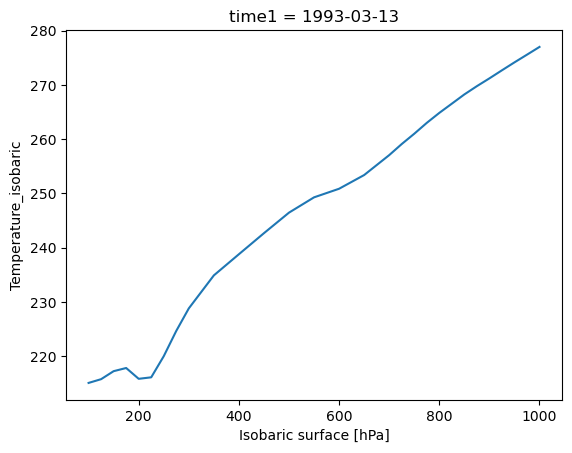

In [52]:
prof.plot()

In the figure shown above, Xarray has generated a line plot, which uses the mean temperature profile and the <span style='color:red'>'isobaric'</span> coordinate variable as axes. In addition, the axis labels and unit information have been read automatically from the <span style='color:red'>DataArray</span>’s metadata.

### Customizing the plot

As mentioned above, the <span style='color:red'>.plot()</span> method of Xarray <span style='color:red'>DataArrays</span> uses Matplotlib behind the scenes. Therefore, knowledge of Matplotlib can help you more easily customize plots generated by Xarray.

In this example, we need to customize the air temperature profile plot created above. There are two changes that need to be made:

* swap the axes, so that the Y (vertical) axis corresponds to isobaric levels

* invert the Y axis to match the model of air pressure decreasing at higher altitudes

We can make these changes by adding certain keyword arguments when calling <span style='color:red'>.plot()</span>, as shown below:

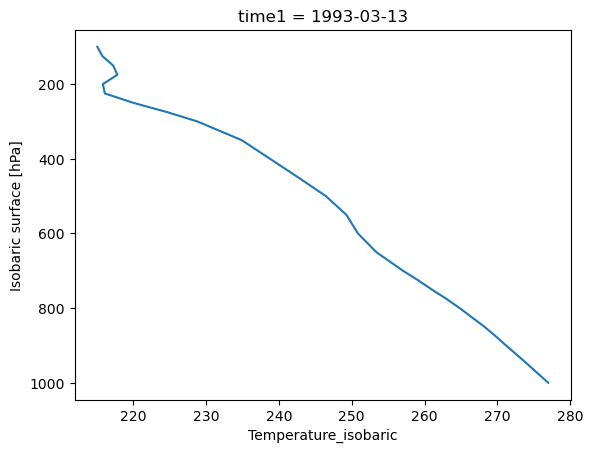

In [53]:
prof.plot(y="isobaric1", yincrease=False)

### Plotting 2-D data

In the previous example, we used <span style='color:red'>.plot()</span> to generate a plot from 1-D data, and the result was a line plot. In this section, we illustrate plotting of 2-D data.

In this example, we illustrate basic plotting of a 2-D array:

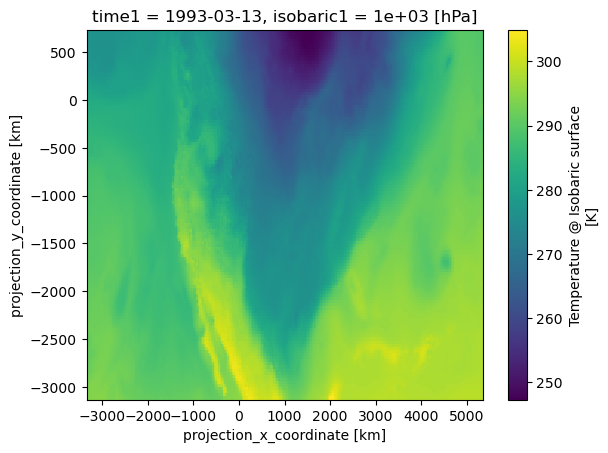

In [54]:
temps.sel(isobaric1=1000).plot()

The figure above is generated by Matplotlib’s <span style='color:red'>pcolormesh</span> method, which was automatically called by Xarray’s <span style='color:red'>plot</span> method. This occurred because Xarray recognized that the <span style='color:red'>DataArray</span> object calling the <span style='color:red'>plot</span> method contained two distinct coordinate variables.

The plot generated by the above example is a map of air temperatures over North America, on the 1000 hPa isobaric surface. If a different map projection or added geographic features are needed on this plot, the plot can easily be modified using Cartopy()(https://foundations.projectpythia.org/core/cartopy.html).